# Get and explore dataset

In [672]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import re
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score

In [673]:
# Make results reproducible - set random seed
from numpy.random import seed
seed(42)

In [674]:
negative_file = "negative.txt"
positive_file = "positive.txt"

In [675]:
# Do not modify - helper function to load and preprocess data
def filter_words(line):    
    line = re.sub(r'[^\w\s]','',line.rstrip())
    words = line.split(" ") 
    words = [i.lower() for i in words if i]      
    return " ".join(words)

def load_data(filename):
    thefile = open(filename, 'r') 
    lines = thefile.readlines() 

    data = []
    for l in range(0,len(lines)): 
        if(lines[l-1].strip() == "<title>"): 
            theline = filter_words(lines[l])
            if(len(theline) < 50):
                data.append(theline)            
            
    return data

# Helper function to convert categorical data to class label
def to_word_label(y):
    y = to_class(y)   
    return ["positive" if i==0 else "negative" for i in y]

# Helper function to convert class label to numeric label
def to_numeric_label(y):
  return [0 if i=="positive" else 1 for i in word_labels]

# Helper function: this function needs to be called before sending arrays to sklearn metrics,
# it converts back to class form from categorical form. ie: [1,0] --> 0, [0,1] --> 1
def to_class(y):
    return np.argmax(y,axis=1) 

In [676]:
positive = load_data(positive_file)
negative = load_data(negative_file)

print(positive[0:10])
print(negative[0:10])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book', 'to the point and beautifully illustrated', 'at least somebody has got it', 'beautifully written heartwarming story', 'an excellent cookbook full of delicious recipes', 'an outstanding resource']
['horrible book horrible', 'shallow selfindulgence', 'horrible book horrible', 'disappointment', 'a disappointing mess', 'save your money there are better books out there', 'thank you but no thanks', 'unendurable', 'the hard way', 'some good info among the political commercial']


In [677]:
# Do not modify - Combines the positive and negative reviews into a single list and create labels
data = positive + negative
word_labels = ["positive"] * len(positive) + ["negative"] * len(negative) 

# Converts labels to numbers in one-hot encoding - [1, 0] (positive) or [0, 1] (negative)
from keras.utils import to_categorical
labels  = to_categorical(to_numeric_label(word_labels))

Text(0.5, 1.0, 'Counts of Negative and Positive Reviews')

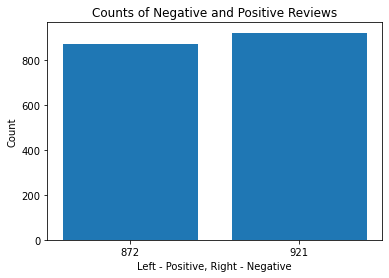

In [678]:
# Write some code to investigate the dataset.
lab = ['positive', 'negative']
counts = [0, 0]
for word in word_labels:
    if word == 'positive':
        counts[0] = counts[0] + 1
    else:
        counts[1] = counts[1] + 1

plt.bar(np.arange(len(lab)), counts, align = 'center')
plt.ylabel('Count')
plt.xticks(np.arange(len(lab)), counts)
plt.xlabel('Left - Positive, Right - Negative')
plt.title("Counts of Negative and Positive Reviews")



Mean:
24.676519799219186
Standard Deviation:
11.28405192884278
Number of unique words:
2559


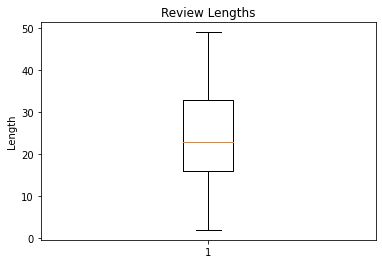

In [679]:
# - Calculate and report the mean review size, its standard deviation and create a boxplot.
lengths = []
for review in data:
    size = len(review)
    lengths.append(size)

print('Mean:')
print(np.mean(lengths))
standard_deviation = np.std(lengths)
print('Standard Deviation:')
print(standard_deviation)

plt.boxplot(lengths)
plt.title('Review Lengths')
plt.ylabel('Length')

# - Calculate the number of unique words in the dataset
words = []
count = 0
for review in data:
    temp_list = review.split(' ')
    for word in temp_list:
        if word.lower() not in words:
            count+=1
            words.append(word)

print('Number of unique words:')
print(count)
            
# - Perform any other dataset investigation that you feel would be valuable
 

In [680]:
# Do not modify - Tokenize the vocabulary 
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=25)

tokenizer.fit_on_texts(data) #create the vocabularry

tokenized_data = tokenizer.texts_to_sequences(data) #tokenize the data using the vocabulary

vocab_size = len(tokenizer.word_index) + 1 

# Compare a sample of the data before and after tokenization
print(data[0:5])
print(tokenized_data[0:5])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book']
[[18, 4, 2, 19], [2, 4, 2], [], [6, 4], [1, 12, 3]]


# Pre-processing

In [681]:
# Pre-processing
# Write some code to pre-process the data so that each review is the same length

tokenized_data = tf.keras.preprocessing.sequence.pad_sequences(tokenized_data, maxlen=4)

In [682]:
# Write some code to split the data into a training and test set. Make sure you shuffle the data. Use 20% for the test set.

x_train, x_test, y_train, y_test = train_test_split(tokenized_data, labels, random_state = 123)


In [683]:


# Fill in the following function so it
# - makes a prediction for the test set given the model
# - reports the precision, recall and f1 score. Also print the confusion matrix. 
# You will need to use the helper to_class function to convert y_pred and y_test before supplying them to the sklearn functions.

def assess_model(model, x_test, y_test):      
    #To do
    ''' 
    first define y_pred as predicting based on x_test. Then push y_test and y_pred into to_class function. 
    Then using sklearn to determine all scores. Lastly will use sklearn to display the confusion matrix
    '''
    y_pred = model.predict(x_test)
    y_pred = to_class(y_pred)
    y_test = to_class(y_test)
    precision_score = sklearn.metrics.precision_score(y_test, y_pred)
    recall_score = sklearn.metrics.recall_score(y_test, y_pred)
    f1_score = sklearn.metrics.f1_score(y_test, y_pred)
    print('Precision Score:')
    print(precision_score)
    print('Recall Score:')
    print(recall_score)
    print('F1 Score:')
    print(f1_score)
    
    print(sklearn.metrics.confusion_matrix(y_test, y_pred))

    
    

# Build and tune model

Define network architecture

In [684]:
#create model with output_dim = 10
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Embedding(input_dim = vocab_size, output_dim = 10, input_length = 4))
model1.add(tf.keras.layers.SpatialDropout1D(0.2))
model1.add(tf.keras.layers.BatchNormalization())
model1.add(LSTM(32))
model1.add(tf.keras.layers.Dense(2, activation = 'softmax'))

# Complete: Compile the model
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


Train model

In [685]:
# Complete: Fit the model
model1.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 5, batch_size = 10)
print('Model Performance:')
assess_model(model1, x_test, y_test)

Epoch 1/5
135/135 [==============================] - 3s 6ms/step - loss: 0.6888 - accuracy: 0.5327 - val_loss: 0.6908 - val_accuracy: 0.5813
Epoch 2/5
135/135 [==============================] - 0s 2ms/step - loss: 0.6688 - accuracy: 0.5915 - val_loss: 0.6823 - val_accuracy: 0.5813
Epoch 3/5
135/135 [==============================] - 0s 3ms/step - loss: 0.6480 - accuracy: 0.6042 - val_loss: 0.6688 - val_accuracy: 0.6058
Epoch 4/5
135/135 [==============================] - 0s 2ms/step - loss: 0.6439 - accuracy: 0.6138 - val_loss: 0.6611 - val_accuracy: 0.5991
Epoch 5/5
135/135 [==============================] - 0s 2ms/step - loss: 0.6427 - accuracy: 0.6146 - val_loss: 0.6625 - val_accuracy: 0.5924
Model Performance:
15/15 [==============================] - 0s 1ms/step
Precision Score:
0.597972972972973
Recall Score:
0.7344398340248963
F1 Score:
0.6592178770949721
[[ 89 119]
 [ 64 177]]


In [686]:
#create model with output_dim = 25
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Embedding(input_dim = vocab_size, output_dim = 25, input_length = 4))
model2.add(tf.keras.layers.SpatialDropout1D(0.2))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(LSTM(32))
model2.add(tf.keras.layers.Dense(2, activation = 'softmax'))

# Complete: Compile the model
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# Complete: Fit the model
model2.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 5, batch_size = 10)
print('Model Performance:')
assess_model(model2, x_test, y_test)

Epoch 1/5
135/135 [==============================] - 3s 6ms/step - loss: 0.6788 - accuracy: 0.5573 - val_loss: 0.6879 - val_accuracy: 0.5924
Epoch 2/5
135/135 [==============================] - 0s 3ms/step - loss: 0.6581 - accuracy: 0.6034 - val_loss: 0.6786 - val_accuracy: 0.6036
Epoch 3/5
135/135 [==============================] - 0s 3ms/step - loss: 0.6443 - accuracy: 0.6183 - val_loss: 0.6651 - val_accuracy: 0.6013
Epoch 4/5
135/135 [==============================] - 0s 3ms/step - loss: 0.6415 - accuracy: 0.6265 - val_loss: 0.6589 - val_accuracy: 0.6147
Epoch 5/5
135/135 [==============================] - 0s 3ms/step - loss: 0.6342 - accuracy: 0.6205 - val_loss: 0.6572 - val_accuracy: 0.6102
Model Performance:
15/15 [==============================] - 0s 1ms/step
Precision Score:
0.625
Recall Score:
0.6846473029045643
F1 Score:
0.6534653465346535
[[109  99]
 [ 76 165]]


In [687]:
#create model with output_dim = 50
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Embedding(input_dim = vocab_size, output_dim = 50, input_length = 4))
model3.add(tf.keras.layers.SpatialDropout1D(0.2))
model3.add(tf.keras.layers.BatchNormalization())
model3.add(LSTM(32))
model3.add(tf.keras.layers.Dense(2, activation = 'softmax'))

# Complete: Compile the model
model3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# Complete: Fit the model
model3.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 5, batch_size = 10)
print('Model Performance:')
assess_model(model3, x_test, y_test)

Epoch 1/5
135/135 [==============================] - 3s 6ms/step - loss: 0.6836 - accuracy: 0.5580 - val_loss: 0.6879 - val_accuracy: 0.5523
Epoch 2/5
135/135 [==============================] - 0s 3ms/step - loss: 0.6544 - accuracy: 0.6101 - val_loss: 0.6801 - val_accuracy: 0.5791
Epoch 3/5
135/135 [==============================] - 0s 3ms/step - loss: 0.6461 - accuracy: 0.6190 - val_loss: 0.6676 - val_accuracy: 0.5991
Epoch 4/5
135/135 [==============================] - 0s 3ms/step - loss: 0.6369 - accuracy: 0.6280 - val_loss: 0.6595 - val_accuracy: 0.5969
Epoch 5/5
135/135 [==============================] - 0s 3ms/step - loss: 0.6233 - accuracy: 0.6347 - val_loss: 0.6724 - val_accuracy: 0.5857
Model Performance:
15/15 [==============================] - 0s 1ms/step
Precision Score:
0.6190476190476191
Recall Score:
0.5933609958506224
F1 Score:
0.6059322033898304
[[120  88]
 [ 98 143]]


In [688]:
#create model with output_dim = 100
model4 = tf.keras.models.Sequential()
model4.add(tf.keras.layers.Embedding(input_dim = vocab_size, output_dim = 100, input_length = 4))
model4.add(tf.keras.layers.SpatialDropout1D(0.2))
model4.add(tf.keras.layers.BatchNormalization())
model4.add(LSTM(32))
model4.add(tf.keras.layers.Dense(2, activation = 'softmax'))

# Complete: Compile the model
model4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# Complete: Fit the model
model4.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 5, batch_size = 10)
print('Model Performance:')
assess_model(model4, x_test, y_test)

Epoch 1/5
135/135 [==============================] - 3s 6ms/step - loss: 0.6762 - accuracy: 0.5945 - val_loss: 0.6886 - val_accuracy: 0.5857
Epoch 2/5
135/135 [==============================] - 0s 3ms/step - loss: 0.6467 - accuracy: 0.6116 - val_loss: 0.6787 - val_accuracy: 0.5947
Epoch 3/5
135/135 [==============================] - 0s 3ms/step - loss: 0.6399 - accuracy: 0.6228 - val_loss: 0.6646 - val_accuracy: 0.6147
Epoch 4/5
135/135 [==============================] - 0s 3ms/step - loss: 0.6270 - accuracy: 0.6443 - val_loss: 0.6593 - val_accuracy: 0.5969
Epoch 5/5
135/135 [==============================] - 0s 3ms/step - loss: 0.6273 - accuracy: 0.6399 - val_loss: 0.6633 - val_accuracy: 0.5924
Model Performance:
15/15 [==============================] - 0s 1ms/step
Precision Score:
0.605072463768116
Recall Score:
0.6929460580912863
F1 Score:
0.6460348162475822
[[ 99 109]
 [ 74 167]]


Examine performance of model

Looking at the 4 output_dim, the model with output_dim = 10 had the best score overall. There wasn't much change throughout, but the recall and F1 score tended to decrease as the output_dim increased, while the precision score only increased or decreased marginally. Therefore, model 1 had the best overall score as its recall score was 73%, precision score of 60%, and F1 score of 66%.

Plot graphs for accuracy and loss

Epoch 1/5
135/135 [==============================] - 3s 6ms/step - loss: 0.6809 - accuracy: 0.5722 - val_loss: 0.6881 - val_accuracy: 0.5835
Epoch 2/5
135/135 [==============================] - 0s 3ms/step - loss: 0.6518 - accuracy: 0.6049 - val_loss: 0.6789 - val_accuracy: 0.6169
Epoch 3/5
135/135 [==============================] - 0s 3ms/step - loss: 0.6422 - accuracy: 0.6213 - val_loss: 0.6661 - val_accuracy: 0.6125
Epoch 4/5
135/135 [==============================] - 0s 3ms/step - loss: 0.6336 - accuracy: 0.6362 - val_loss: 0.6627 - val_accuracy: 0.5924
Epoch 5/5
135/135 [==============================] - 0s 3ms/step - loss: 0.6271 - accuracy: 0.6332 - val_loss: 0.6720 - val_accuracy: 0.5902


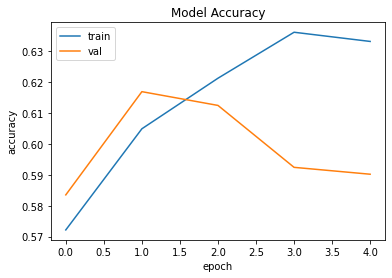

In [689]:
#create model with output_dim = 100
model5 = tf.keras.models.Sequential()
model5.add(tf.keras.layers.Embedding(input_dim = vocab_size, output_dim = 100, input_length = 4))
model5.add(tf.keras.layers.SpatialDropout1D(0.2))
model5.add(tf.keras.layers.BatchNormalization())
model5.add(LSTM(32))
model5.add(tf.keras.layers.Dense(2, activation = 'softmax'))

# Complete: Compile the model
model5.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# Complete: Fit the model
history = model5.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 5, batch_size = 10)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')

#reference: https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy

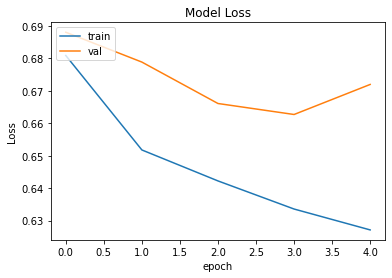

In [690]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')

Looking at the model accuracy, we can see that it reaches its best accuracy at 3 epochs, and then begins to decrease there after. We can also see in the value in model loss begings to plateau after 2 epochs and increase again after 3 epochs. Therefore, for the best model we want to use 3 epochs to reach our best results.

In [691]:
#create model with epochs = 3
model_final = tf.keras.models.Sequential()
model_final.add(tf.keras.layers.Embedding(input_dim = vocab_size, output_dim = 10, input_length = 4))
model_final.add(tf.keras.layers.SpatialDropout1D(0.2))
model_final.add(tf.keras.layers.BatchNormalization())
model_final.add(LSTM(32))
model_final.add(tf.keras.layers.Dense(2, activation = 'softmax'))

# Complete: Compile the model
model_final.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# Complete: Fit the model
model_final.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 3, batch_size = 10)
print('Model Performance:')
assess_model(model_final, x_test, y_test)

Epoch 1/3
135/135 [==============================] - 3s 6ms/step - loss: 0.6811 - accuracy: 0.5618 - val_loss: 0.6895 - val_accuracy: 0.5947
Epoch 2/3
135/135 [==============================] - 0s 2ms/step - loss: 0.6659 - accuracy: 0.6004 - val_loss: 0.6812 - val_accuracy: 0.5724
Epoch 3/3
135/135 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.6049 - val_loss: 0.6735 - val_accuracy: 0.5969
Model Performance:
15/15 [==============================] - 0s 1ms/step
Precision Score:
0.5920245398773006
Recall Score:
0.8008298755186722
F1 Score:
0.6807760141093474
[[ 75 133]
 [ 48 193]]


On our final model, we can see that the precision score is very similar to the other models, but the recall score jumps up to 80% and the F1 score is higher at 68%.

# Make a prediction

In [699]:
# This is a very small set of completed new data to use to make predictions.
prediction_data = ["this book is fabulous","i hated this book", "the best", "no good", "okay"]
tokenized = tokenizer.texts_to_sequences(prediction_data)
padded = tf.keras.preprocessing.sequence.pad_sequences(tokenized, padding='post', maxlen=4)

# Supply this data to each of your models and see how it does. 
# You can call the helper function "to_word_label" to map the output of the model to the name of the
# class it was predicted to belong to.
y_pred = model_final.predict(padded)
print(to_word_label(y_pred))




1/1 [==============================] - 0s 12ms/step
['negative', 'negative', 'positive', 'negative', 'negative']


As we can see, the model did struggle with these sample predictions. It did correctly mark the 3 review as positive, and the 2 and 4 as negative, however it failed to mark the 1 review as positive even though this one is obvious. The last review being netural explains the model marking it as negative when positive may have been a better choice. Overall, the model struggles to sift through netural reviews and sometimes makes mistakes on the more obvious reviews as well.